# IMPORT LIBRARIES AND DATASETS

In [58]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [59]:
# load the data
df_english = pd.read_csv("/kaggle/input/datasett/en-fr/en", sep = '/t', engine='python', names = ['english'])
df_french = pd.read_csv("/kaggle/input/datasett/en-fr/fr", sep = '/t', engine='python', names = ['french'])

In [60]:
df_english

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."
...,...
137855,"france is never busy during march , and it is ..."
137856,"india is sometimes beautiful during spring , a..."
137857,"india is never wet during summer , but it is s..."
137858,"france is never chilly during january , but it..."


In [61]:
df_french

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."
...,...
137855,"la france est jamais occupée en mars , et il e..."
137856,"l' inde est parfois belle au printemps , et il..."
137857,"l' inde est jamais mouillé pendant l' été , ma..."
137858,"la france est jamais froid en janvier , mais i..."


In [62]:
df = pd.concat([df_english, df_french], axis = 1)

In [63]:
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


# PERFORM DATA CLEANING

In [64]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
# function to remove punctuations
def remove_punc(x):
    return re.sub('[!#?,.:";]', '', x)

In [66]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [67]:
english_words = []
french_words  = []

In [68]:
def get_unique_words(x, word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)

df["english"].apply(lambda x: get_unique_words(x, english_words));
df["french"].apply(lambda x: get_unique_words(x, french_words));

In [69]:
# number of unique words in french
total_english_words = len(english_words)
total_french_words = len(french_words)
print(total_english_words)
print(total_french_words)

199
350


# VISUALIZE CLEANED UP DATASET

In [70]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
    for word in i.split():
        words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [71]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 14046,
         'fruit': 27192,
         'grape': 4848,
         'but': 63987,
         'my': 9700,
         'apple': 4848,
         'his': 9700,
         'favorite': 28332,
         'orange': 4848,
         'paris': 11334,
         'relaxing': 8696,
         'decem

In [72]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [73]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [74]:
english_words, english_counts = zip(*english_words_counts)
english_words = list(english_words)
english_counts = list(english_counts)

In [75]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [76]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [77]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

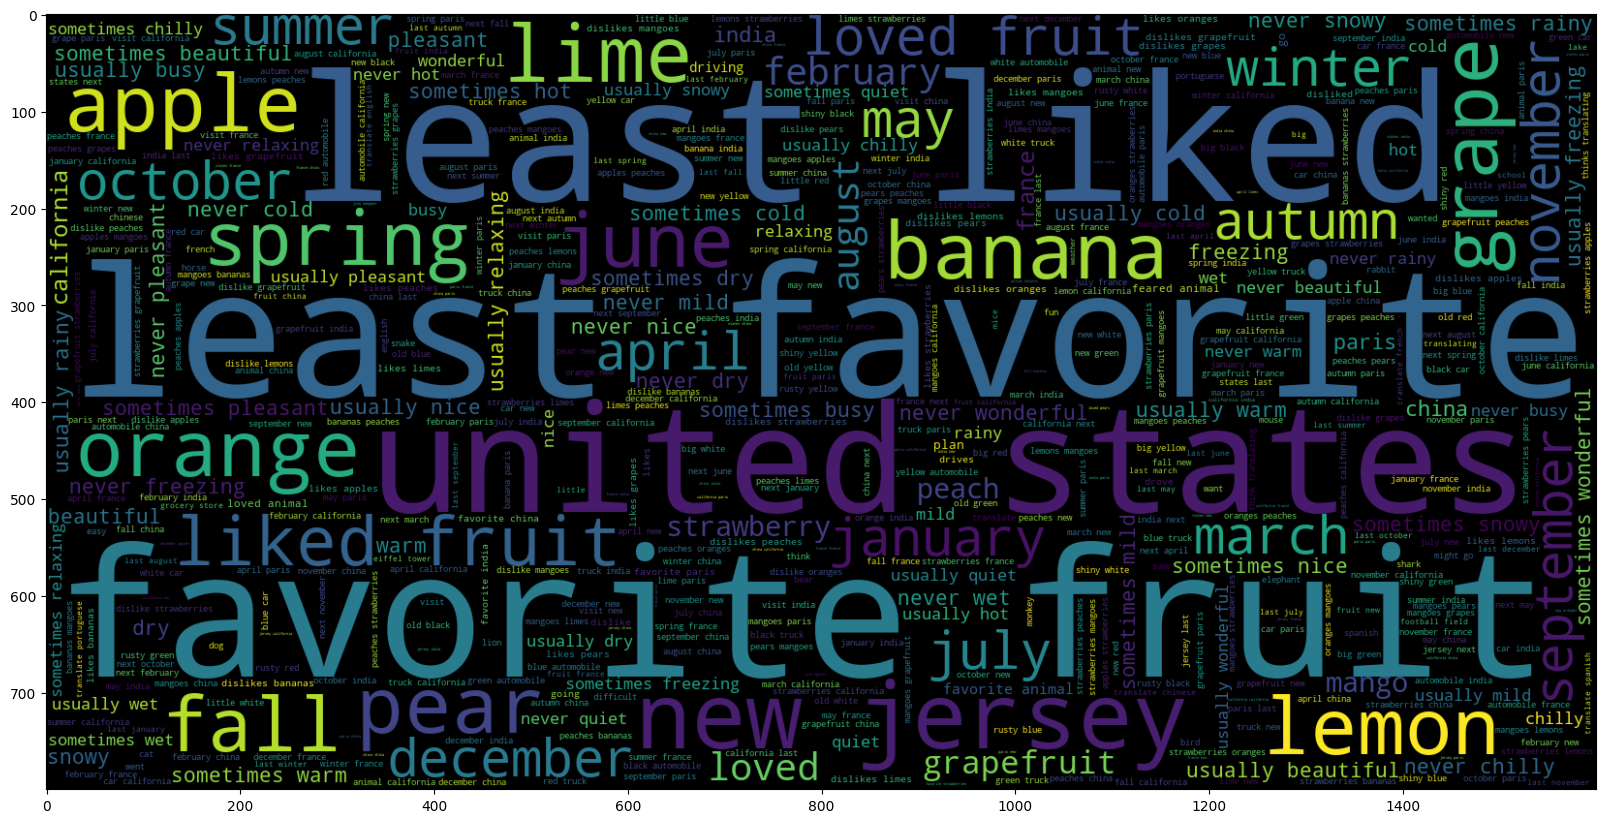

In [78]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [79]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [80]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [81]:
# Obtain list of all words in the dataset
words = []
for i in df['french']:
    for word in i.split():
        words.append(word)
    
words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gèle',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'généralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'généralement',
 'chaud',
 'en',
 'juin',
 'les',
 'états-unis',
 'est',
 'parfois',
 'légère',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimé',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'préféré',
 'est',
 "l'orange",
 'mais',
 'mon',
 'préféré',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'décembre',
 'mais',
 'il',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupé',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaude',
 'en',
 'mars',
 'n

In [82]:
# Obtain the total count of words
french_words_counts = Counter(words)
french_words_counts

Counter({'new': 11047,
         'jersey': 11052,
         'est': 196809,
         'parfois': 37746,
         'calme': 7256,
         'pendant': 10741,
         "l'": 32917,
         'automne': 14727,
         'et': 59851,
         'il': 84079,
         'neigeux': 1867,
         'en': 105768,
         'avril': 8954,
         'les': 65255,
         'états-unis': 11210,
         'généralement': 31292,
         'froid': 16794,
         'juillet': 8956,
         'gèle': 3622,
         'habituellement': 6215,
         'novembre': 8951,
         'california': 3061,
         'mars': 9023,
         'chaud': 16405,
         'juin': 9133,
         'légère': 63,
         'fait': 2916,
         'septembre': 8958,
         'votre': 9368,
         'moins': 27557,
         'aimé': 25852,
         'fruit': 23626,
         'le': 35306,
         'raisin': 4852,
         'mais': 63987,
         'mon': 9403,
         'la': 49861,
         'pomme': 4848,
         'son': 16496,
         'préféré': 23305,
   

In [83]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [84]:
french_words_counts

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('généralement', 31292),
 ('moins', 27557),
 ('aimé', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('préféré', 23305),
 ('agréable', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('à', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('états-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('été', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('décembre', 8945),
 ('février', 8942),
 ('octobre', 8911),


In [85]:
french_words, french_counts = zip(*french_words_counts)
french_words = list(french_words)
french_counts = list(french_counts)

In [86]:
french_words

['est',
 'en',
 'il',
 'les',
 'mais',
 'et',
 'la',
 'parfois',
 'jamais',
 'le',
 "l'",
 'généralement',
 'moins',
 'aimé',
 'au',
 'fruit',
 'préféré',
 'agréable',
 'froid',
 'son',
 'chaud',
 'de',
 'plus',
 'automne',
 'mois',
 'à',
 'elle',
 'citrons',
 'paris',
 'inde',
 'états-unis',
 'france',
 'jersey',
 'new',
 'chine',
 'pendant',
 'pamplemousse',
 'mon',
 'votre',
 'juin',
 'printemps',
 'janvier',
 'hiver',
 'mars',
 'été',
 'mai',
 'septembre',
 'juillet',
 'avril',
 'novembre',
 'décembre',
 'février',
 'octobre',
 'aime',
 'août',
 'merveilleux',
 'relaxant',
 'doux',
 'humide',
 'notre',
 'californie',
 'sec',
 'leur',
 'occupé',
 'pluvieux',
 'calme',
 'beau',
 'habituellement',
 'pommes',
 'pêches',
 'oranges',
 'poires',
 'fraises',
 'bananes',
 'verts',
 'raisins',
 'mangues',
 "d'",
 'mangue',
 'gel',
 'raisin',
 'pomme',
 "l'orange",
 'citron',
 'chaux',
 'banane',
 'poire',
 'fraise',
 'pêche',
 'pas',
 'enneigée',
 'favori',
 'déteste',
 'gèle',
 'fruits',
 '

In [87]:
french_counts

[196809,
 105768,
 84079,
 65255,
 63987,
 59851,
 49861,
 37746,
 37215,
 35306,
 32917,
 31292,
 27557,
 25852,
 25738,
 23626,
 23305,
 17751,
 16794,
 16496,
 16405,
 15070,
 14934,
 14727,
 14350,
 13870,
 12056,
 11679,
 11334,
 11277,
 11210,
 11170,
 11052,
 11047,
 10936,
 10741,
 10140,
 9403,
 9368,
 9133,
 9100,
 9090,
 9038,
 9023,
 8999,
 8995,
 8958,
 8956,
 8954,
 8951,
 8945,
 8942,
 8911,
 8870,
 8789,
 8704,
 8458,
 8458,
 8446,
 8319,
 8189,
 7957,
 7855,
 7782,
 7658,
 7256,
 6387,
 6215,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5835,
 5780,
 5774,
 5100,
 4899,
 4886,
 4852,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4495,
 4008,
 3857,
 3743,
 3622,
 3566,
 3510,
 3411,
 3185,
 3131,
 3061,
 3016,
 2916,
 2726,
 2715,
 2520,
 2517,
 2435,
 2248,
 1944,
 1927,
 1867,
 1706,
 1666,
 1548,
 1465,
 1437,
 1356,
 1308,
 1278,
 1239,
 1198,
 1180,
 1124,
 1116,
 1111,
 1111,
 1094,
 1072,
 1053,
 1018,
 1001,
 972,
 972,
 966,
 908,
 837,
 836,
 834,
 7

In [88]:
# Plot barplot using plotly 
fig = px.bar(x = french_words, y = french_counts)
fig.show()

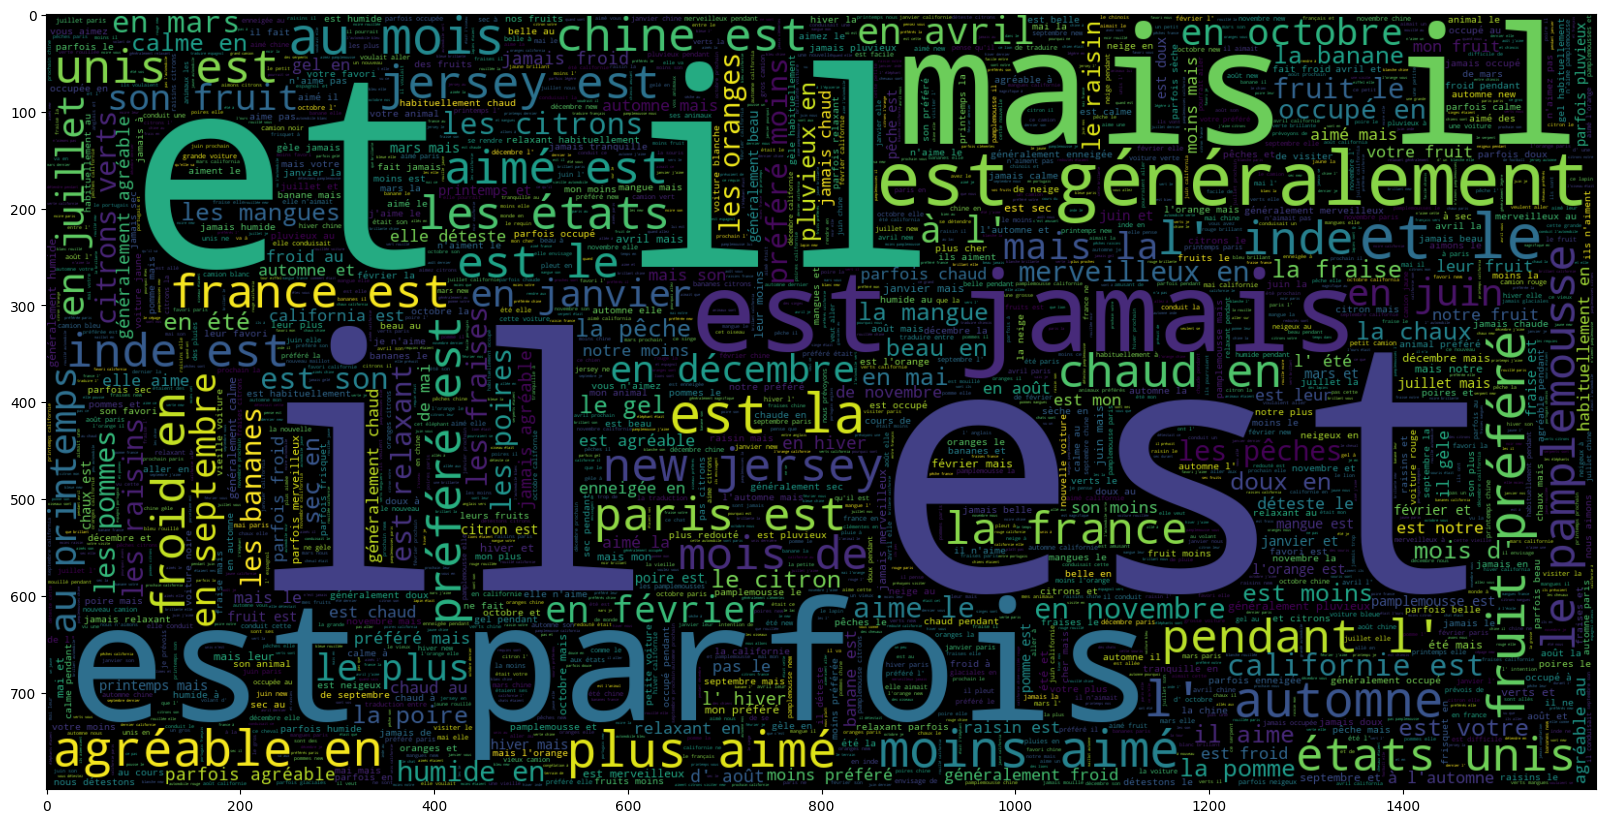

In [89]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [90]:
df.french[0]
nltk.word_tokenize(df.french[0])

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 'l',
 "'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril']

In [91]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


# PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [92]:
def tokenize_and_pad(x, maxlen):
    #  a tokenier to tokenize the words and create sequences of tokenized words
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
    
    return tokenizer, sequences, padded

In [93]:
# tokenize and padding to the data 
maxlen = max(maxlen_english, maxlen_french)
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen)

In [94]:
import pickle
with open('english_tokenizer.pkl', 'wb') as file:
    pickle.dump(x_tokenizer, file)

with open('french_tokenizer.pkl', 'wb') as file:
    pickle.dump(y_tokenizer, file)

In [95]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [96]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [97]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0]]


In [98]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [99]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [100]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [101]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.2)

# BUILD AND TRAIN THE MODEL 

In [102]:
# Sequential Model
'''model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()'''
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length=maxlen, mask_zero=True))
# encoder
model.add(Bidirectional(LSTM(256)))
# decoder
model.add(RepeatVector(maxlen))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23, 256)           51200     
                                                                 
 bidirectional (Bidirectiona  (None, 512)              1050624   
 l)                                                              
                                                                 
 repeat_vector_1 (RepeatVect  (None, 23, 512)          0         
 or)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 23, 512)          1574912   
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 23, 351)          180063    
 tributed)                                            

In [103]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(110288, 23, 1)

In [ ]:
# train the model
'''model.fit(x_train, y_train, batch_size=1024, validation_split= 0.2, epochs=10)'''

# Train the model
model.fit(x_train, y_train, batch_size=1024, validation_split=0.2, epochs=20)

Epoch 1/20
87/87 [==============================] - 446s 5s/step - loss: 2.5549 - accuracy: 0.5062 - val_loss: 1.8112 - val_accuracy: 0.5561
Epoch 2/20
87/87 [==============================] - 429s 5s/step - loss: 1.5976 - accuracy: 0.5962 - val_loss: 1.3783 - val_accuracy: 0.6409
Epoch 3/20
87/87 [==============================] - 424s 5s/step - loss: 1.2645 - accuracy: 0.6626 - val_loss: 1.1441 - val_accuracy: 0.6952
Epoch 4/20
87/87 [==============================] - 425s 5s/step - loss: 1.0467 - accuracy: 0.7133 - val_loss: 0.9350 - val_accuracy: 0.7427
Epoch 5/20
87/87 [==============================] - 422s 5s/step - loss: 0.8695 - accuracy: 0.7561 - val_loss: 0.7820 - val_accuracy: 0.7801
Epoch 6/20
87/87 [==============================] - 422s 5s/step - loss: 0.7163 - accuracy: 0.7953 - val_loss: 0.6526 - val_accuracy: 0.8113
Epoch 7/20
87/87 [==============================] - 422s 5s/step - loss: 0.5910 - accuracy: 0.8275 - val_loss: 0.5506 - val_accuracy: 0.8377
Epoch 8/20
87

In [ ]:
# save the model
model.save("new.h5")

# ASSESS TRAINED MODEL PERFORMANCE


In [ ]:
# function to make prediction
'''def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])'''
def prediction(x, x_tokenizer=x_tokenizer, y_tokenizer=y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    predicted_sequence = []
    for j in np.argmax(predictions, 1):
        word = id_to_word[j]
        if word == '':
            break
        if word != '<EOS>':
            predicted_sequence.append(word)
        else:
            break
    return ' '.join(predicted_sequence)




In [ ]:
for i in range(200):
    print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
    print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
    print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))